### Libraries Used 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Importing dataset 

In [2]:
df1=pd.read_csv("full_data.csv")

#### Checking if any nulls present

In [3]:
no_nulls=df1.columns[df1.isnull().mean()==0]

In [4]:
no_nulls

Index(['date', 'location', 'new_cases', 'new_deaths', 'total_cases',
       'total_deaths'],
      dtype='object')

#### Overview of data

In [5]:
df1.head()

,date,location,new_cases,new_deaths,total_cases,total_deaths
0,2019-12-31,Afghanistan,0,0,0,0
1,2020-01-01,Afghanistan,0,0,0,0
2,2020-01-02,Afghanistan,0,0,0,0
3,2020-01-03,Afghanistan,0,0,0,0
4,2020-01-04,Afghanistan,0,0,0,0


<b> As there were 0 in all the rows, dropped the 0's. </b>

In [15]:
df1 = df1.replace(0, np.nan)

In [25]:
dfnew=df1.dropna(thresh=4)

As there is date field, I wanted to check the date type. The type is object.

In [47]:
dfnew.dtypes

date             object
location         object
new_cases       float64
new_deaths      float64
total_cases     float64
total_deaths    float64
dtype: object

<b> Changing the object type to datetime for analysis </b>

In [48]:
dfnew['date']=pd.to_datetime(dfnew.date)

/Users/smirtidwibedi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [49]:
dfnew.dtypes

date            datetime64[ns]
location                object
new_cases              float64
new_deaths             float64
total_cases            float64
total_deaths           float64
dtype: object

In [53]:
dfnew['date'].value_counts()

2020-05-25    187
2020-05-22    186
2020-05-26    186
2020-05-16    186
2020-05-04    186
             ... 
2020-01-05      2
2019-12-31      2
2020-01-14      2
2020-01-23      2
2020-01-16      2
Name: date, Length: 140, dtype: int64

<b> Restricting the date to a month from April to May 2019 </b>

In [57]:
df1new=dfnew[(dfnew['date'] > '2020-03-01') & (dfnew['date'] < '2020-06-01')]

In [58]:
df1new

,date,location,new_cases,new_deaths,total_cases,total_deaths
63,2020-03-08,Afghanistan,3.0,NaN,4.0,NaN
64,2020-03-11,Afghanistan,3.0,NaN,7.0,NaN
65,2020-03-15,Afghanistan,3.0,NaN,10.0,NaN
66,2020-03-16,Afghanistan,6.0,NaN,16.0,NaN
67,2020-03-17,Afghanistan,5.0,NaN,21.0,NaN
...,...,...,...,...,...,...
19600,2020-05-22,Zimbabwe,3.0,NaN,51.0,4.0
19601,2020-05-23,Zimbabwe,5.0,NaN,56.0,4.0
19602,2020-05-24,Zimbabwe,NaN,NaN,56.0,4.0
19603,2020-05-25,Zimbabwe,NaN,NaN,56.0,4.0


In [61]:
df1more=df1new[df1new['total_cases']> 100000]

In [68]:
df1more=df1more[df1more['location']!='World']

In [69]:
df1more

,date,location,new_cases,new_deaths,total_cases,total_deaths
2662,2020-05-04,Brazil,4588.0,275.0,101147.0,7025.0
2663,2020-05-05,Brazil,6633.0,296.0,107780.0,7321.0
2664,2020-05-06,Brazil,6935.0,600.0,114715.0,7921.0
2665,2020-05-07,Brazil,10503.0,615.0,125218.0,8536.0
2666,2020-05-08,Brazil,9888.0,610.0,135106.0,9146.0
...,...,...,...,...,...,...
18740,2020-05-22,United States,25434.0,1263.0,1577287.0,94702.0
18741,2020-05-23,United States,24147.0,1305.0,1601434.0,96007.0
18742,2020-05-24,United States,21236.0,1080.0,1622670.0,97087.0
18743,2020-05-25,United States,20568.0,633.0,1643238.0,97720.0


In [70]:
df1more.isnull().mean()

date            0.000000
location        0.000000
new_cases       0.002381
new_deaths      0.004762
total_cases     0.000000
total_deaths    0.000000
dtype: float64

In [93]:
cols3=df1more.groupby(["location"])[["new_cases"]].sum()

In [96]:
cols3.nlargest(11,'new_cases')

,new_cases
location,
United States,1576311.0
Brazil,278339.0
Russia,254028.0
United Kingdom,162708.0
Spain,139278.0
Italy,132469.0
Germany,79777.0
Turkey,59140.0
India,49211.0


In [85]:
cols4=df1more.groupby(["location"])[["new_deaths"]].sum()

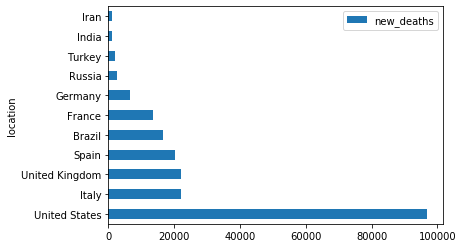

In [89]:
cols4.nlargest(11,'new_deaths').plot.barh()

In [97]:
df1more

,date,location,new_cases,new_deaths,total_cases,total_deaths
2662,2020-05-04,Brazil,4588.0,275.0,101147.0,7025.0
2663,2020-05-05,Brazil,6633.0,296.0,107780.0,7321.0
2664,2020-05-06,Brazil,6935.0,600.0,114715.0,7921.0
2665,2020-05-07,Brazil,10503.0,615.0,125218.0,8536.0
2666,2020-05-08,Brazil,9888.0,610.0,135106.0,9146.0
...,...,...,...,...,...,...
18740,2020-05-22,United States,25434.0,1263.0,1577287.0,94702.0
18741,2020-05-23,United States,24147.0,1305.0,1601434.0,96007.0
18742,2020-05-24,United States,21236.0,1080.0,1622670.0,97087.0
18743,2020-05-25,United States,20568.0,633.0,1643238.0,97720.0


In [103]:
df11more=df1more[(df1more['date'] > '2020-04-30') & (df1more['date'] < '2020-06-01')]

In [104]:
df11more

,date,location,new_cases,new_deaths,total_cases,total_deaths
2662,2020-05-04,Brazil,4588.0,275.0,101147.0,7025.0
2663,2020-05-05,Brazil,6633.0,296.0,107780.0,7321.0
2664,2020-05-06,Brazil,6935.0,600.0,114715.0,7921.0
2665,2020-05-07,Brazil,10503.0,615.0,125218.0,8536.0
2666,2020-05-08,Brazil,9888.0,610.0,135106.0,9146.0
...,...,...,...,...,...,...
18740,2020-05-22,United States,25434.0,1263.0,1577287.0,94702.0
18741,2020-05-23,United States,24147.0,1305.0,1601434.0,96007.0
18742,2020-05-24,United States,21236.0,1080.0,1622670.0,97087.0
18743,2020-05-25,United States,20568.0,633.0,1643238.0,97720.0


In [112]:
usa=df11more.loc[df11more['location']=="United States"]

In [114]:
usa['date'].min(),usa['date'].max()

(Timestamp('2020-05-01 00:00:00'), Timestamp('2020-05-26 00:00:00'))

In [115]:
usa.isnull().sum()

date            0
location        0
new_cases       0
new_deaths      0
total_cases     0
total_deaths    0
dtype: int64

In [117]:
usa = usa.set_index('date')
usa.index

DatetimeIndex(['2020-05-01', '2020-05-02', '2020-05-03', '2020-05-04',
               '2020-05-05', '2020-05-06', '2020-05-07', '2020-05-08',
               '2020-05-09', '2020-05-10', '2020-05-11', '2020-05-12',
               '2020-05-13', '2020-05-14', '2020-05-15', '2020-05-16',
               '2020-05-17', '2020-05-18', '2020-05-19', '2020-05-20',
               '2020-05-21', '2020-05-22', '2020-05-23', '2020-05-24',
               '2020-05-25', '2020-05-26'],
              dtype='datetime64[ns]', name='date', freq=None)

In [118]:
usa.shape[0]

26

In [119]:
usa.shape[1]

5

#####  The USA's new_cases for May 2019

In [124]:
y=usa['new_cases']

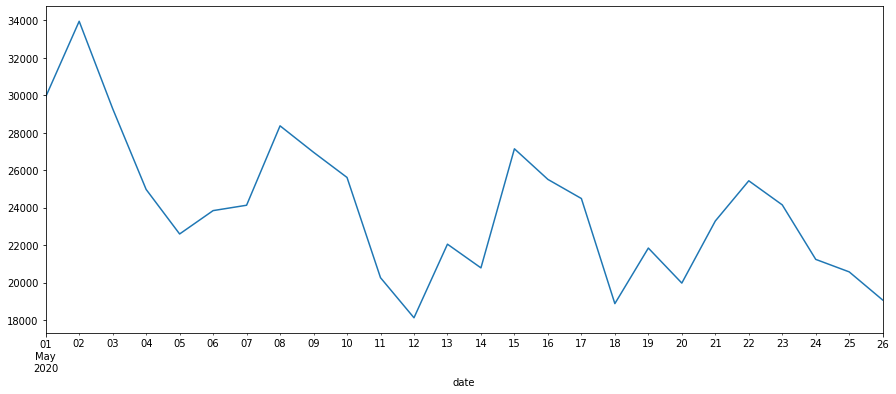

In [126]:
y.plot(figsize=(15,6))
plt.show()

<b> Checking the seasonal, trend and observed model. We can see that there is a decrease in the trend. The data 
not seasonal. </b>

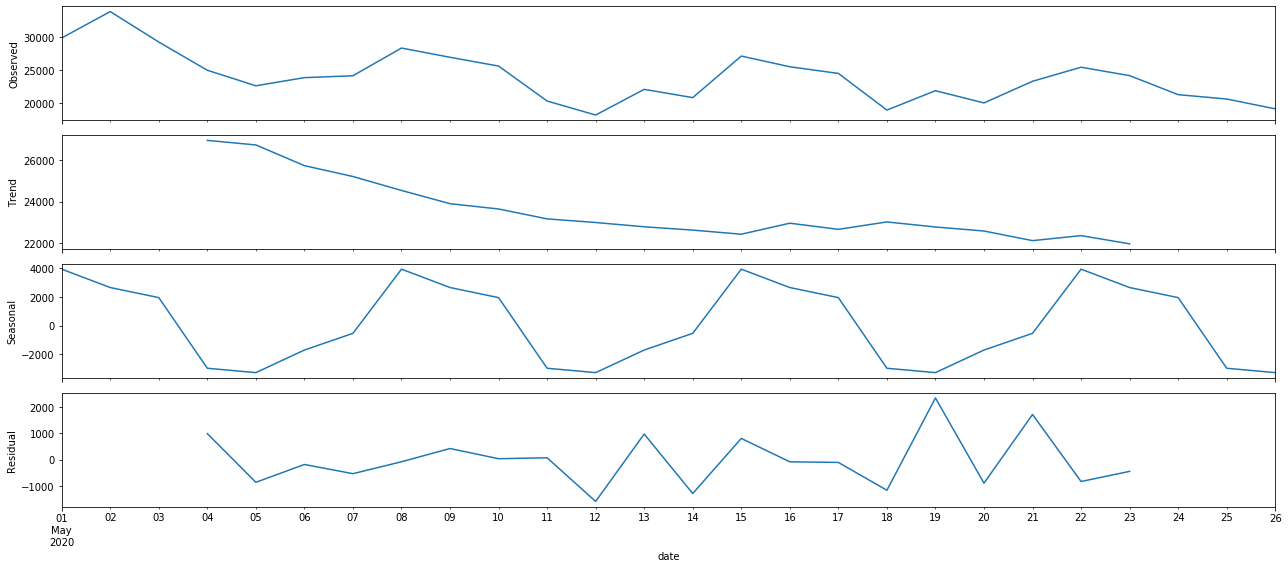

In [128]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

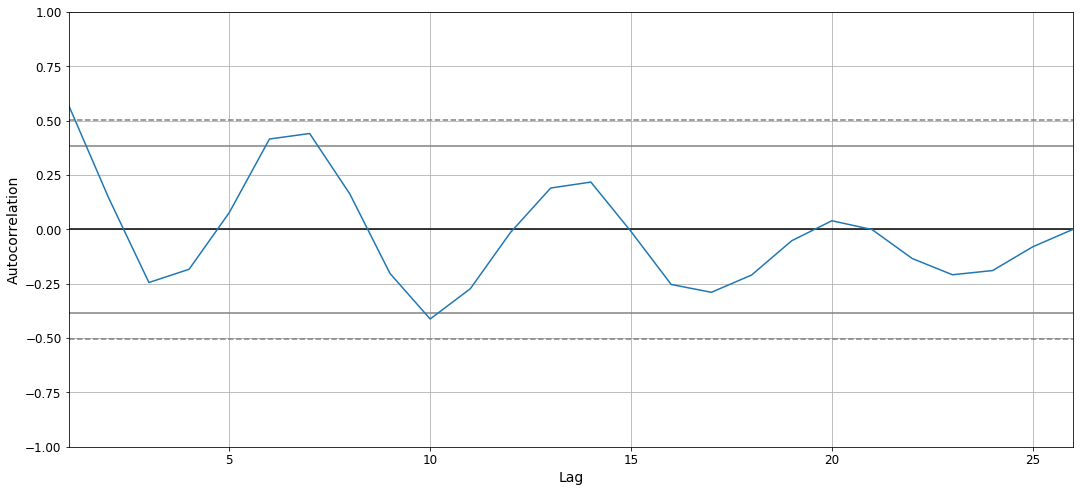

In [150]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(y)

/Users/smirtidwibedi/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/Users/smirtidwibedi/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:            D.new_cases   No. Observations:                   25
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -224.703
Method:                       css-mle   S.D. of innovations           1768.102
Date:                Sun, 31 May 2020   AIC                            463.405
Time:                        18:25:16   BIC                            471.937
Sample:                    05-02-2020   HQIC                           465.772
                         - 05-26-2020                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              -263.5479    104.237     -2.528      0.020    -467.849     -59.246
ar.L1.D.new_cases    -0.6310      0.164     -3.844      0.001      -0.953      -0.309
ar.L2.D.new_cases    -0.

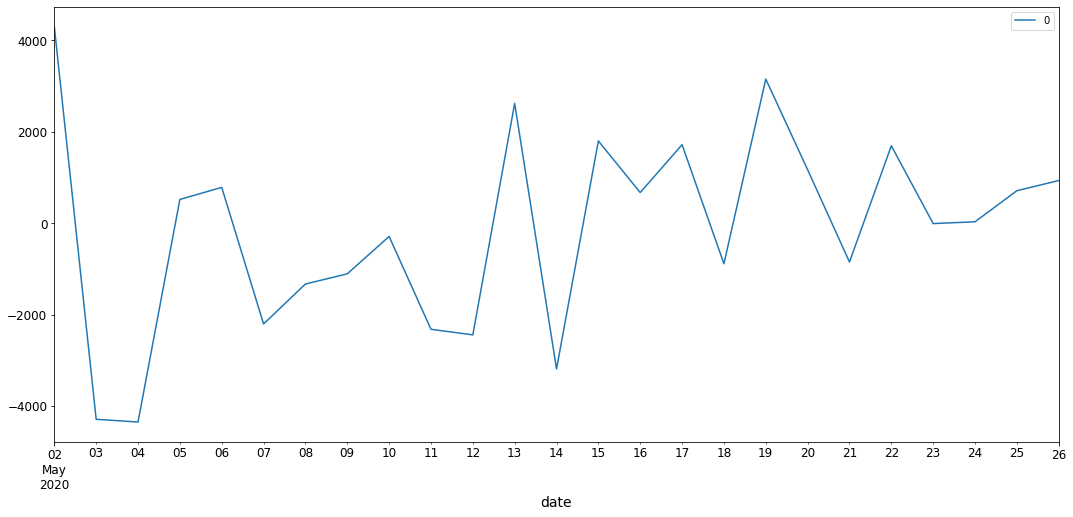

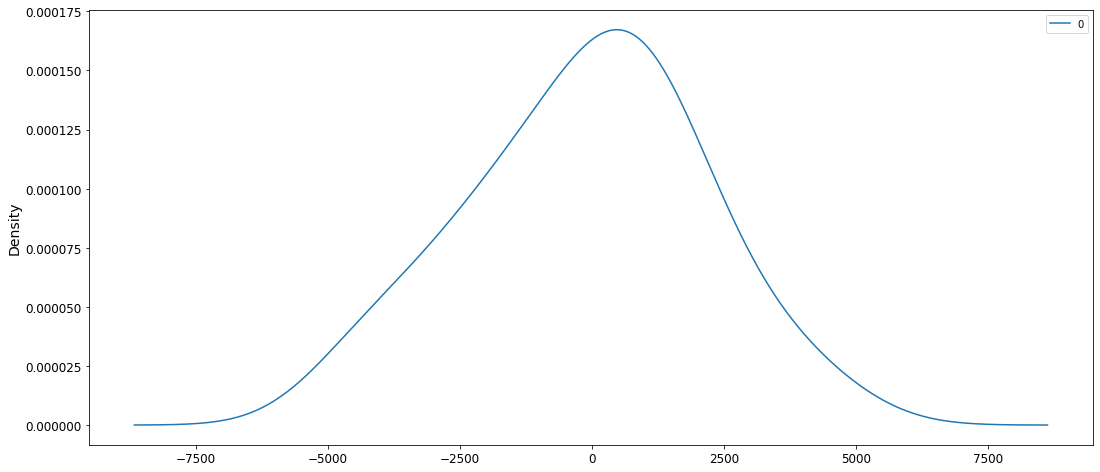

                 0
count    25.000000
mean   -124.423422
std    2201.689293
min   -4347.866754
25%   -1328.121553
50%      33.153823
75%    1172.393252
max    4301.547872


In [193]:
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(y, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

In [194]:
from sklearn.metrics import mean_squared_error

### Forecasting the new_cases, The train and test is splitted and results can be seen.

predicted=19897.326730, expected=18873.000000


/Users/smirtidwibedi/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/smirtidwibedi/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/smirtidwibedi/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted=16745.212452, expected=21841.000000
predicted=16896.933805, expected=19970.000000
predicted=24242.209407, expected=23285.000000
predicted=23179.196855, expected=25434.000000
predicted=23954.820071, expected=24147.000000
predicted=21223.436492, expected=21236.000000
predicted=19730.954907, expected=20568.000000
predicted=17937.321050, expected=19064.000000
Test MSE: 4940839.979


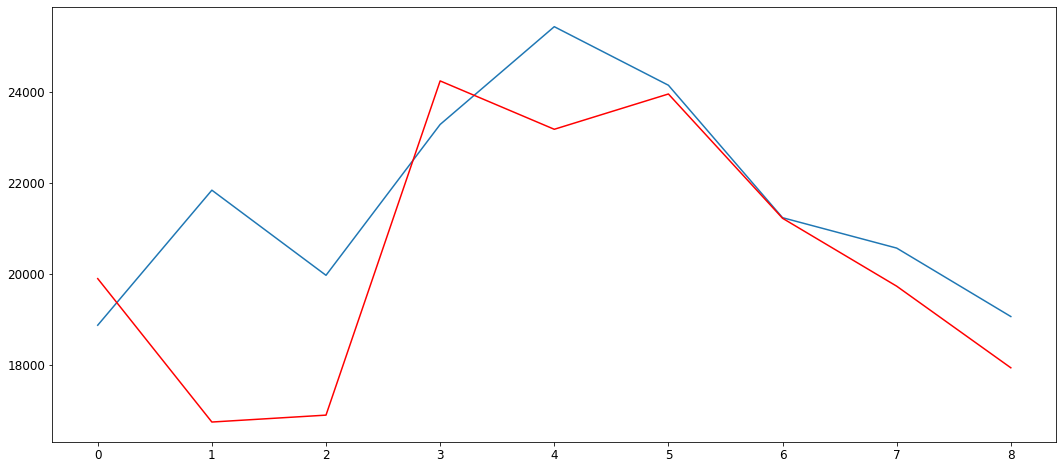

In [195]:
X = y.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()


<b> The model can be tuned more and as MSE is high. Also, the prediction is not accurate. </b>